# US Geodata

In [14]:
import os
import sys

from IPython.display import IFrame
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
# import missingno as msno
# import seaborn as sns
# import matplotlib.patches as patches
# import warnings
# import networkx as nx
# import osmnx as ox
# import requests
# import matplotlib.cm as cm
# import matplotlib.colors as colors

import urllib
import zipfile
import glob

## Downloading US geodata through census.gov

The [US Census Bureau](https://www.census.gov/) has [Cartographic Boundary Files](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) available for download.

[![census_geographies_mapping-files](https://raw.githubusercontent.com/katkim0307/COVID-19_Response_Comparison/master/Data/image/census_geo_map_page.PNG)](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)


#### Additional Link for another shapefile from [DATA.GOV](https://catalog.data.gov/dataset/tiger-line-shapefile-2017-nation-u-s-current-county-and-equivalent-national-shapefile)

## Download the zipfile and store it in the Data folder

In [15]:
us_counties_url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip'

In [16]:
urllib.request.urlretrieve(us_counties_url, "Data/input/us_counties.zip")

('Data/input/us_counties.zip', <http.client.HTTPMessage at 0x1ff9bdffc88>)

## Unzip the zipfile and Extract

In [17]:
us_counties_zip = zipfile.ZipFile('Data/input/us_counties.zip')

us_counties_zip

<zipfile.ZipFile filename='Data/input/us_counties.zip' mode='r'>

In [18]:
us_counties_zip.extractall('Data/input/us_counties')

## Look in the directory and see what files are available

In [19]:
glob.glob('Data/input/us_counties/*')

['Data/input/us_counties\\cb_2018_us_county_5m.cpg',
 'Data/input/us_counties\\cb_2018_us_county_5m.dbf',
 'Data/input/us_counties\\cb_2018_us_county_5m.prj',
 'Data/input/us_counties\\cb_2018_us_county_5m.shp',
 'Data/input/us_counties\\cb_2018_us_county_5m.shp.ea.iso.xml',
 'Data/input/us_counties\\cb_2018_us_county_5m.shp.iso.xml',
 'Data/input/us_counties\\cb_2018_us_county_5m.shx']

## Read the shapefile in the directory

In [20]:
us_counties_gdf = gpd.read_file('Data/input/us_counties/cb_2018_us_county_5m.shp')

us_counties_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


In [21]:
us_counties_gdf.shape

(3233, 10)

In [22]:
us_counties_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3233 non-null   object  
 1   COUNTYFP  3233 non-null   object  
 2   COUNTYNS  3233 non-null   object  
 3   AFFGEOID  3233 non-null   object  
 4   GEOID     3233 non-null   object  
 5   NAME      3233 non-null   object  
 6   LSAD      3233 non-null   object  
 7   ALAND     3233 non-null   int64   
 8   AWATER    3233 non-null   int64   
 9   geometry  3233 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 252.7+ KB


In [23]:
us_counties_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
us_counties_gdf.to_crs(epsg=4326, inplace=True)

In [25]:
ny_counties_gdf = us_counties_gdf[us_counties_gdf['STATEFP']=='36']

ny_counties_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
7,36,001,00974099,0500000US36001,36001,Albany,06,1354120790,27124553,"POLYGON ((-74.26486 42.41986, -74.24446 42.470..."
84,36,049,00974123,0500000US36049,36049,Lewis,06,3301307118,39612945,"POLYGON ((-75.84056 43.88398, -75.75816 43.878..."
129,36,099,00974147,0500000US36099,36099,Seneca,06,838403627,172828921,"POLYGON ((-76.97853 42.86907, -76.96336 42.872..."
160,36,097,00974146,0500000US36097,36097,Schuyler,06,850405404,36246373,"POLYGON ((-77.10720 42.48377, -76.98933 42.484..."
201,36,003,00974100,0500000US36003,36003,Allegany,06,2666029673,12999275,"POLYGON ((-78.30884 42.52122, -78.04198 42.520..."


In [26]:
ny_counties_gdf.shape

(62, 10)

## Problem 1: There is no State Name, only State Fips code

### Let's get the State name by merging `us_counties_gdf` with `Data/input/us_state_fips/us-state-ansi-fips.csv`

In [27]:
fips_csv_dir = 'Data/input/us_state_fips/us-state-ansi-fips.csv'

In [28]:
fips_df = pd.read_csv(fips_csv_dir)
#fips_df = pd.read_csv(fips_csv_dir, dtype={' fips':object})

fips_df.head()

,stname,fips,stusps
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA


In [29]:
fips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stname   51 non-null     object
 1    fips    51 non-null     int64 
 2    stusps  51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [30]:
fips_df.rename(columns=
    {' fips': 'fips',
    ' stusps': 'postcode',},
    inplace=True)

In [31]:
fips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stname    51 non-null     object
 1   fips      51 non-null     int64 
 2   postcode  51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


## Attribute Joins (Merging on 'STATEFP' and 'State (FIPS)')

Since `us_counties_gdf` is a GeoDataFrame and `fips_df` is a dataframe, I will first convert `us_counties_gdf` to a dataframe, and then merge them.

In [32]:
us_counties_df = pd.DataFrame(us_counties_gdf)

us_counties_df.info()
# type(us_counties_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3233 non-null   object  
 1   COUNTYFP  3233 non-null   object  
 2   COUNTYNS  3233 non-null   object  
 3   AFFGEOID  3233 non-null   object  
 4   GEOID     3233 non-null   object  
 5   NAME      3233 non-null   object  
 6   LSAD      3233 non-null   object  
 7   ALAND     3233 non-null   int64   
 8   AWATER    3233 non-null   int64   
 9   geometry  3233 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 252.7+ KB


In [33]:
merged_df = pd.merge(left=us_counties_df, right=fips_df, how='left', left_on='STATEFP', right_on='fips')

merged_df

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

## Arg, their Dtype is different.  Let's convert `fips_df['fips']` from int64 to string

In [ ]:
fips_df['fips'] = fips_df['fips'].astype(object)

In [ ]:
fips_df.info()

In [ ]:
merged_df = pd.merge(
    left=us_counties_df, 
    right=fips_df, 
    how='left', 
    left_on='STATEFP', 
    right_on='fips'
)

merged_df.head()

In [ ]:
merged_df = merged_df.drop(['fips'], axis=1)

merged_df

In [ ]:
merged_df[merged_df['stname'].isnull()]

## Now let's convert it back to a GeoDataFrame

In [ ]:
us_counties_gdf = gpd.GeoDataFrame(merged_df, geometry=merged_df['geometry'])

us_counties_gdf.head()

In [34]:
us_counties_gdf.shape

(3233, 10)

## Plot the US counties

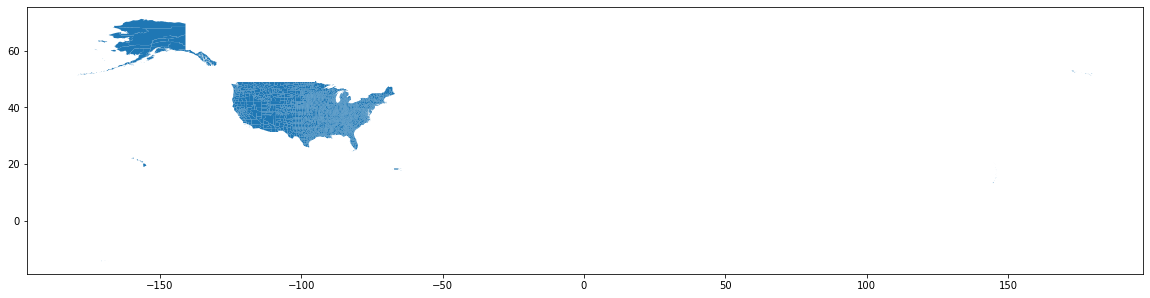

In [35]:
us_counties_gdf.plot(figsize=(20, 20));

## Uh oh..  What's going on?

There are US States that are not necessary for this project including Palau (PW/70), Guam (GU/66), Northern Mariana Islands (MP/69), Puerto Rico (PR/72), and Virgin Islnads (VI/78).  Let's query them out.

In [36]:
us_counties_gdf = us_counties_gdf[
    (us_counties_gdf['STATEFP'] != '70') &
    (us_counties_gdf['STATEFP'] != '66') &
    (us_counties_gdf['STATEFP'] != '69') &
    (us_counties_gdf['STATEFP'] != '72') &
    (us_counties_gdf['STATEFP'] != '78')
]

In [37]:
us_counties_gdf.shape

(3147, 10)

In [39]:
us_counties_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

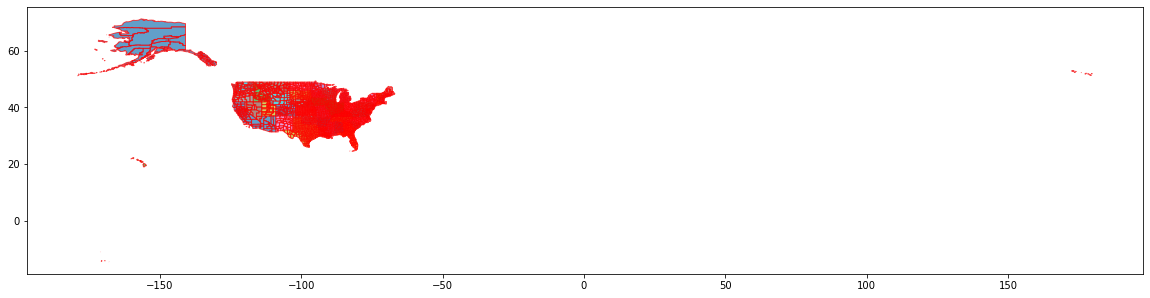

In [38]:
us_counties_gdf.plot(
    figsize=(20, 20),
    column='STATEFP',
    alpha=0.7,    
    edgecolor='red',
);